# Introduction to Matplotlib

1. Concepts in Matplotlib
2. 2 ways of creating plots (pyplot & OO) - use the OO method
3. Plotting data (NumPy arrays), line, scatter, bar, hist, subplots
4. Plotting data directly with Pandas (using the pandas matplotlib wrapper)
5. Plotting data (pandas DataFrames) with the OO method, line, scatter, bar, hist, subplots
6. Cutomizing our plots, limits, colors, styles, legends
7. Saving plots

## 1. Concepts in Matplotlib
- What is Matplotlib?

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 

## 2. 2 ways of creating plots
- `pyplot()`
- `Object oriented` (recommended)

In [1]:
# Import matplotlib and setup the figures to display within the notebook
%matplotlib inline
import matplotlib.pyplot as plt

[]

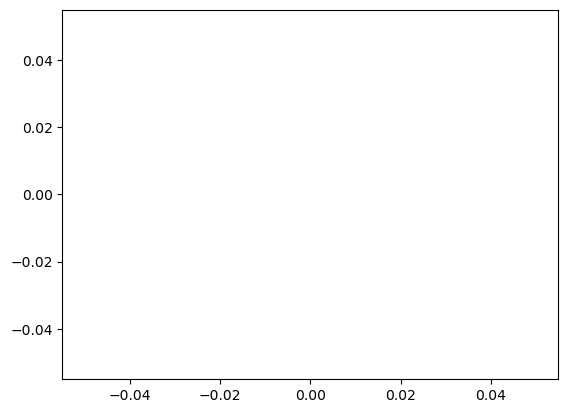

In [2]:
plt.plot()

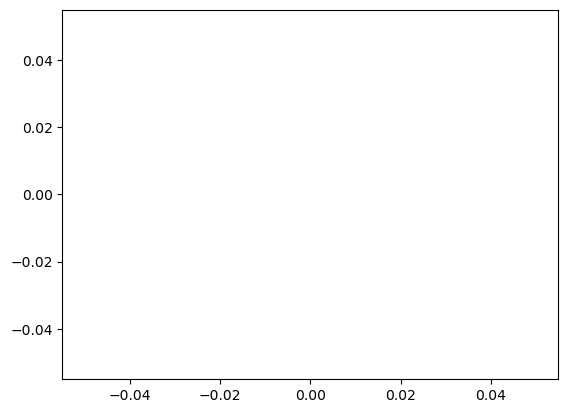

In [3]:
# With the semi-colon
plt.plot();

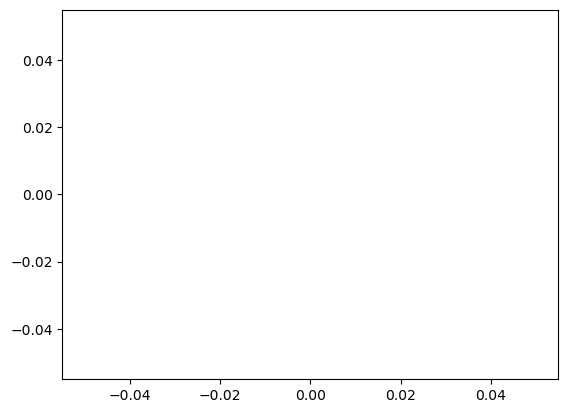

In [4]:
plt.plot()
plt.show();

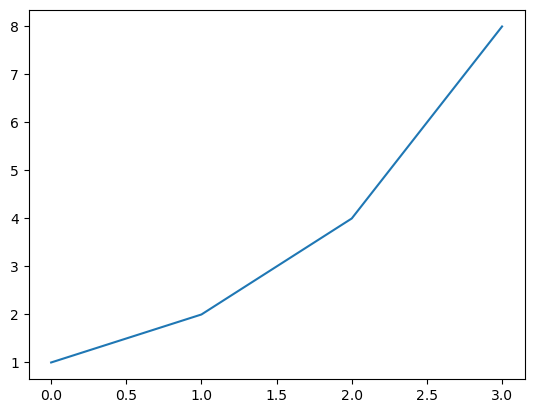

In [5]:
plt.plot([1, 2, 4, 8])

In [6]:
# Create some data
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

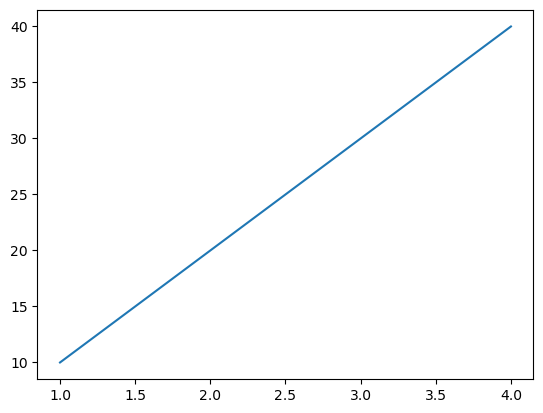

In [7]:
plt.plot(x,y);

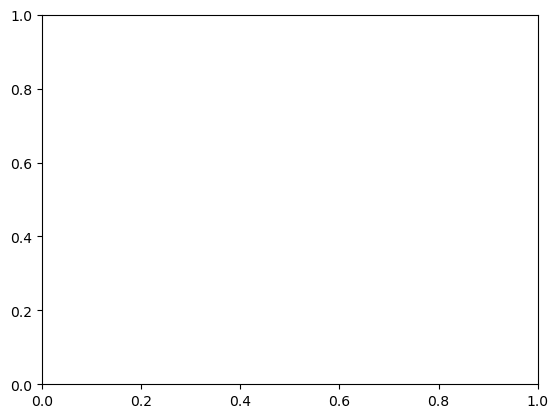

In [8]:
# Creating a plot with OO version
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

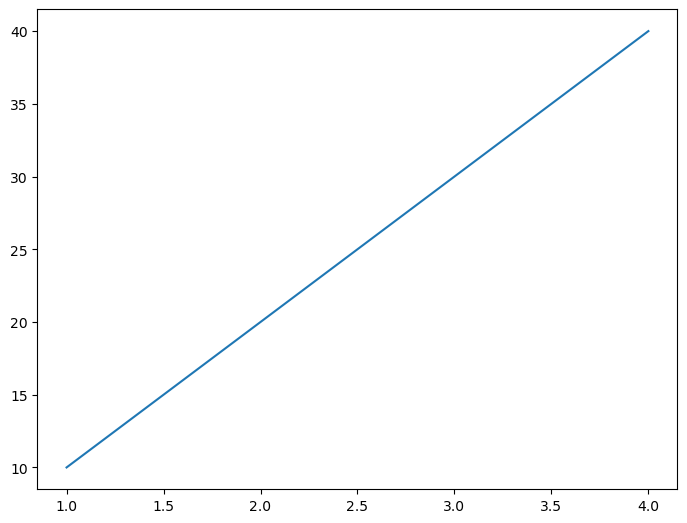

In [9]:
# one more way of OO
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show();

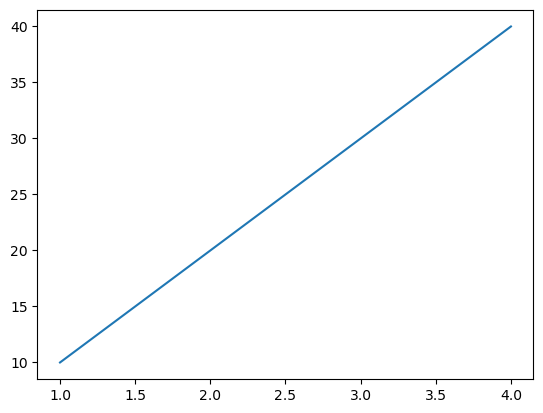

In [10]:
# Easier and more robust going forward
fig, ax = plt.subplots()
ax.plot(x,y);

In [11]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

### A matplotlib workflow

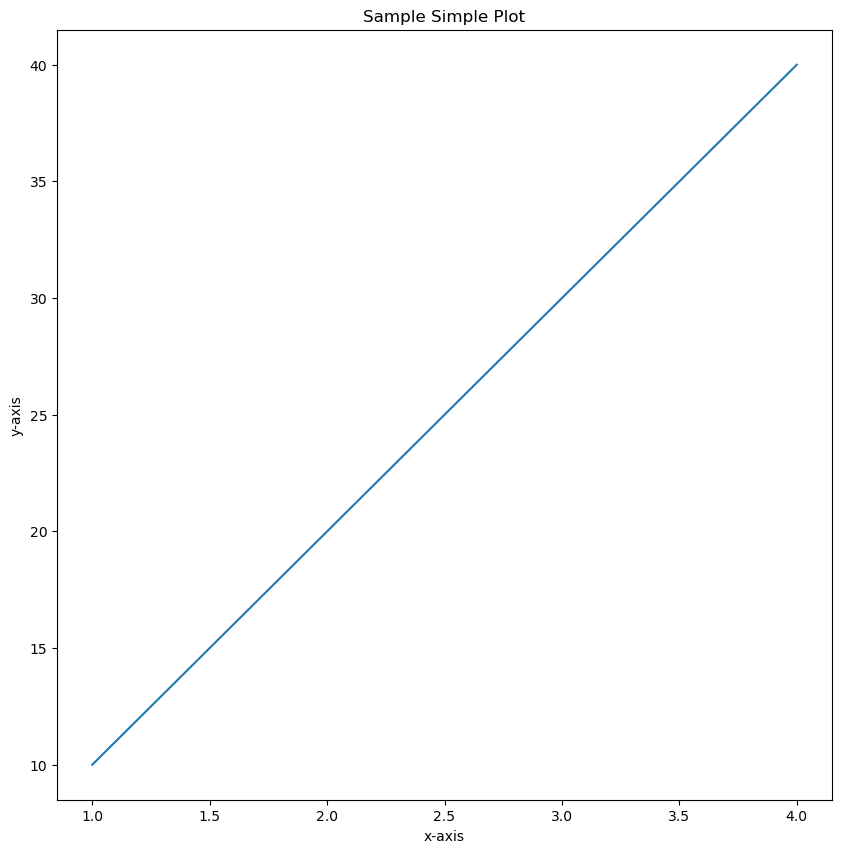

In [13]:
# 1. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 2. Prepare data
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

# 3. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 4. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. save & show
fig.savefig("../images/simple-plot.png")

## 3. Making the most common type of plots using NumPy arrays

Matplotlib visualizations are built off NumPy arrays. So we will try some of the most common types of plots using NumPy arrays

- `line`
- `scatter`
- `bar`
- `hist`
- `subplots()`

In [15]:
import numpy as np

### Line
Line is a default type of visualization in Matplotlib.

In [19]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

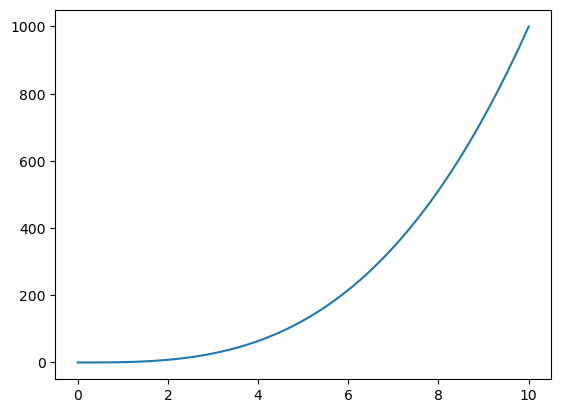

In [21]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**3);

### Scatter


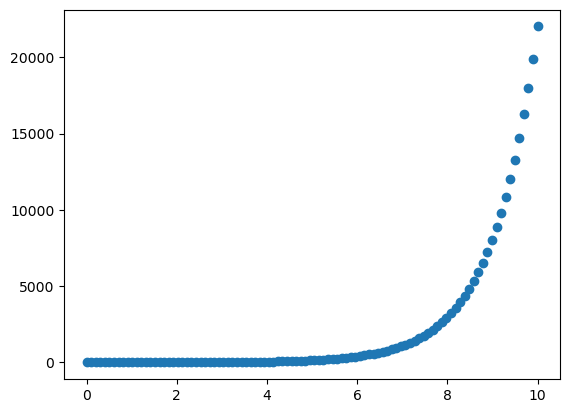

In [25]:
# Need to rereate out figure and axis instance when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

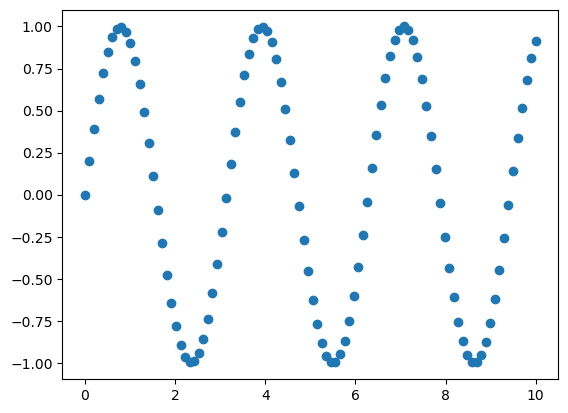

In [27]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x*2));

### Bar
- `Vertical`
- `Horizontal`

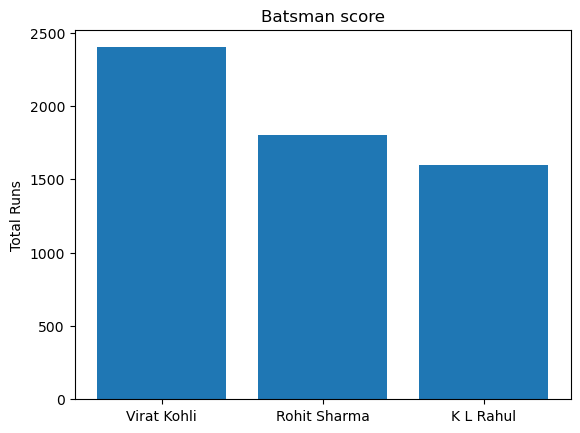

In [30]:
# we can also produce plots from a dictionary
batsman_score = {
    "Virat Kohli": 2400,
    "Rohit Sharma": 1800,
    "K L Rahul": 1600
}
fig, ax = plt.subplots()
ax.bar(batsman_score.keys(), batsman_score.values())
ax.set(title="Batsman score", ylabel="Total Runs");

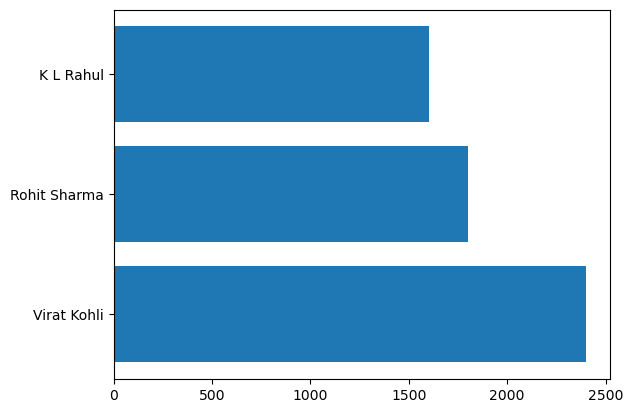

In [33]:
fig, ax = plt.subplots()
ax.barh(list(batsman_score.keys()), list(batsman_score.values()));

### Histogram (hist)
could show image of normal distribution here

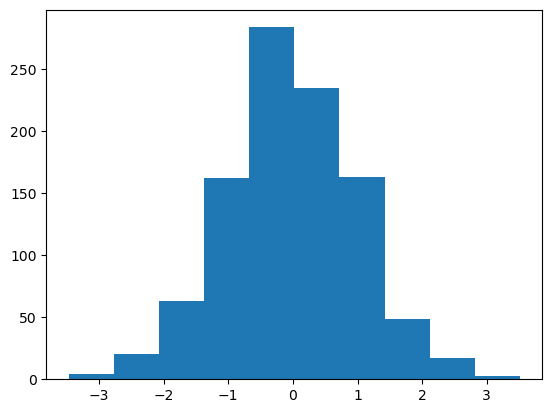

In [34]:
# Pull data from a normal distribution
x = np.random.randn(1000)

fig, ax = plt.subplots()
ax.hist(x);

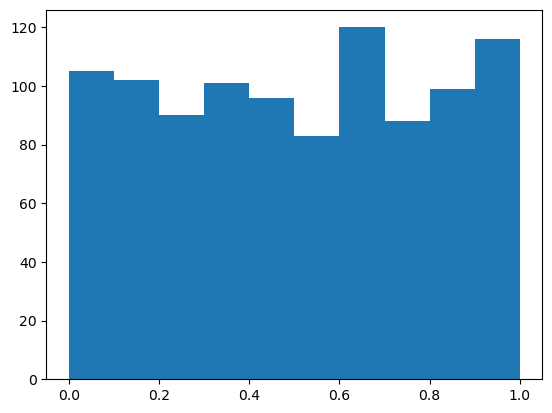

In [35]:
# random data from random distribution
x = np.random.random(1000)

fig, ax = plt.subplots()
ax.hist(x);

### Subplots
- Multiple plots on one figure

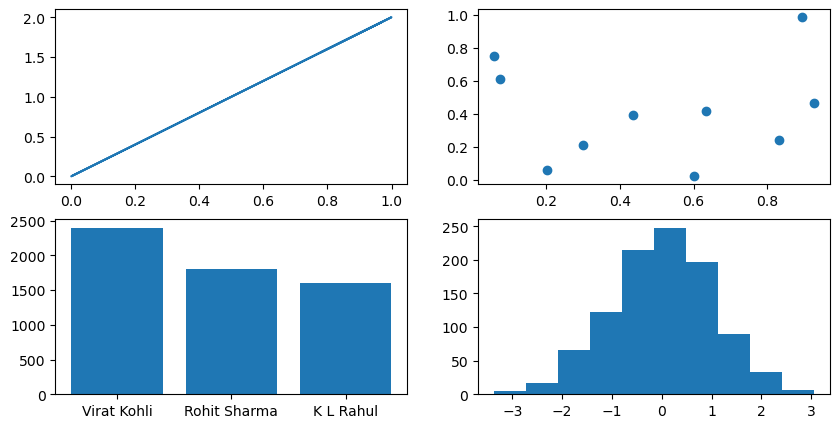

In [46]:
# Option 1 : Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot data to each axes
ax1.plot(x, x*2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(batsman_score.keys(), batsman_score.values());
ax4.hist(np.random.randn(1000));

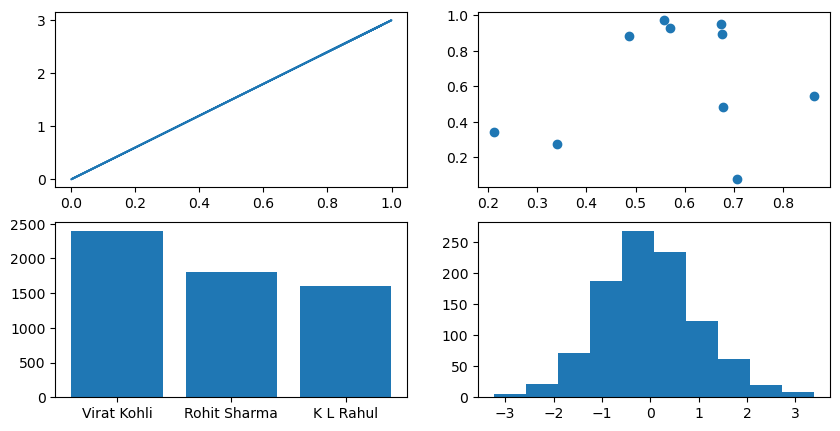

In [47]:
# Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index to plot data
ax[0, 0].plot(x, x*3);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(batsman_score.keys(), batsman_score.values());
ax[1, 1].hist(np.random.randn(1000));